In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal
import scipy.stats as stats

from numpy.core.function_base import linspace

def statsOverTime(index, velocitySignal, numSamples):
  if index <= numSamples:
    currentVelocities = velocitySignal[:index + 1]
  else:
    currentVelocities = velocitySignal[index - numSamples:index + 1]

  # Calculate RMS
  mean = abs(np.mean(currentVelocities))
  rms = np.sqrt(mean)

  # Calculate STD
  squareDiff = np.square(currentVelocities - mean)
  squareDiffMean = np.mean(squareDiff)
  std = np.sqrt(squareDiffMean)

  # Calculate zero-crossing Rate
  zeroCrossingRate = len(np.where(np.diff(np.sign(currentVelocities)))[0]) / len(currentVelocities)

  # Calculate peak and low peak velocity
  peakVelocity = np.max(currentVelocities)
  lowPeakVelocity = np.min(currentVelocities)

  # Calculate crest and low crest factor
  crestFactor = peakVelocity/rms
  lowCrestFactor = lowPeakVelocity/rms

  return [velocitySignal[index], mean, rms, std, zeroCrossingRate, peakVelocity, lowPeakVelocity, crestFactor, lowCrestFactor]

def dominantFreq(data, freq, psdThreshold = 0.1, initFreq = 0.5):
  index = 0
  isRange = False
  dominantFreqRange = [initFreq]

  while index < len(data):
    if data[index] > psdThreshold and isRange == False:
      isRange == True
      dominantFreqRange.append(freq[index])
    elif data[index] < psdThreshold and isRange == True:
      dominantFreqRange.append(freq[index-1])
    index+=1

  return dominantFreqRange

def plotPSD(data, filteredData, title = 'Power Spectral Density', fs = 100):
  time = np.arange(len(filteredData)) / fs
  freqWelch, dataWelch = signal.welch(data, fs, window = 'hamming', scaling = 'spectrum')
  filteredFreqWelch, filteredDataWelch = signal.welch(filteredData, fs, window = 'hamming', scaling = 'spectrum')

  plt.plot(freqWelch, dataWelch, 'b', label = 'Original')
  plt.plot(filteredFreqWelch, filteredDataWelch, 'r', label = 'Filtered')
  plt.title(title)
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('PSD (V^2)')
  plt.legend()
  plt.grid(True)

#Low Ampliude Tremor

Original Signal

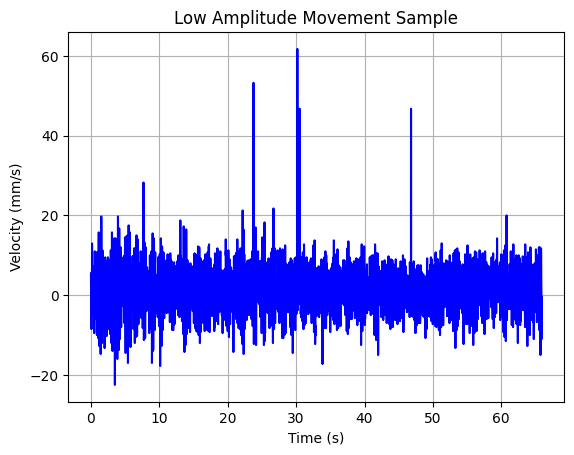

In [ ]:
# Read data from a single column .txt file
dataBase = '/content/drive/MyDrive/s16rof.txt'  # Replace with your file path
velocitySignal = np.loadtxt(dataBase, delimiter='\t')
samplingRate = 100 # Sample rate (Hz) at which the recordings were made
time = np.arange(len(velocitySignal)) / samplingRate

# Calculate statistics over time
dataFrame = []

for index in range(0, len(velocitySignal), 1):
  dataFrame.append(statsOverTime(index, velocitySignal, numSamples = 150))

# Write data to csv
headers = ['velocity', 'mean', 'rms', 'std', 'zero crossing rate', 'peak velocity', 'low peak velocity', 'crest factor', 'low crest factor']
pandasDF = pd.DataFrame(dataFrame, columns = headers)
pandasDF.to_csv('/content/drive/MyDrive/VelocitySignals_Low.csv', index = False, header = headers)

# Identify the dominant Frequencies
freqWelch, dataWelch = signal.welch(velocitySignal, samplingRate, window = 'hamming', scaling = 'spectrum')
dominantFreqRange = dominantFreq(dataWelch, freqWelch)

# Plot the recording
plt.plot(time, velocitySignal, 'b')
plt.title('Low Amplitude Movement Sample')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (mm/s)')
plt.grid(True)

Filtered Signal

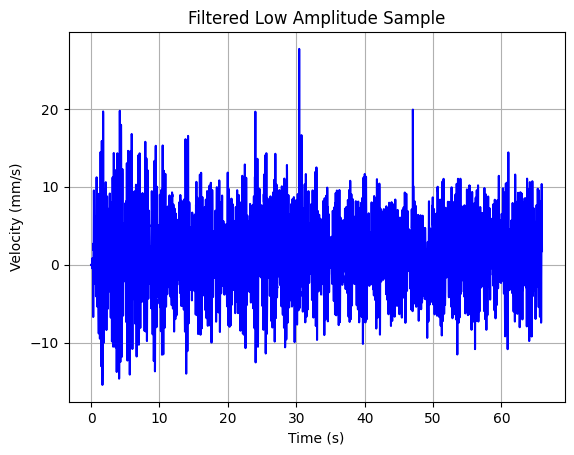

In [ ]:
# Signal filtering
filterOrder = 51
cutoffFreq = dominantFreqRange
firwinCoeff = signal.firwin(filterOrder, cutoffFreq, window='hamming', fs = samplingRate)

# Filter the signal
firwinSignal = signal.lfilter(firwinCoeff, 1.0, velocitySignal)

# Calculate statistics over time
dataFrame = []

for index in range(0, len(firwinSignal), 1):
  dataFrame.append(statsOverTime(index, firwinSignal, numSamples = 300))

# Write data to csv
pandasDF = pd.DataFrame(dataFrame, columns = headers)
pandasDF.to_csv('/content/drive/MyDrive/VelocitySignals_Low_Filtered.csv', index = False, header = headers)

# Identify the dominant Frequencies
freqWelch, dataWelch = signal.welch(firwinSignal, samplingRate, window = 'hamming', scaling = 'spectrum')

# Plot fitered signal
plt.plot(time, firwinSignal, 'b')
plt.title('Filtered Low Amplitude Sample')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (mm/s)')
plt.grid(True)

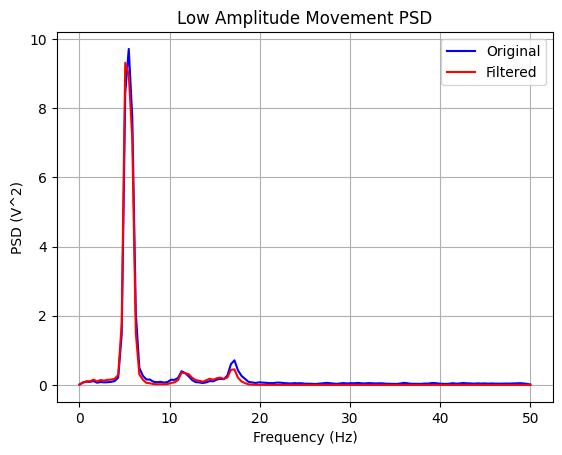

In [ ]:
# Plot Orignal and Fitlered signal PSD
plotPSD(velocitySignal, firwinSignal, title = 'Low Amplitude Movement PSD')

#High Amplitude Tremor

Original Signal

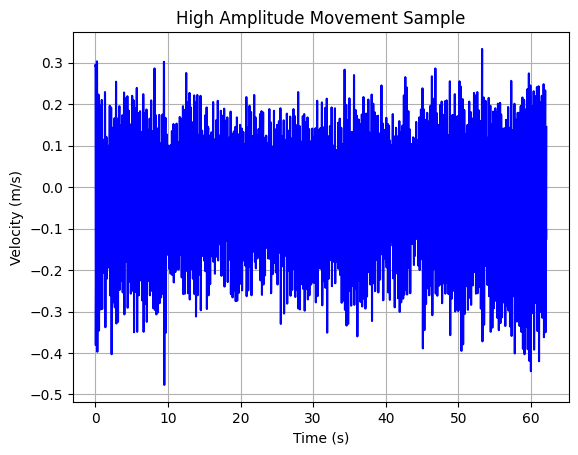

In [ ]:
# Read data from a single column .txt file
dataBase = '/content/drive/MyDrive/s8rof.txt'  # Replace with your file path
velocitySignal = np.loadtxt(dataBase, delimiter='\t')
samplingRate = 100 # Sample rate (Hz) at which the recordings were made
time = np.arange(len(velocitySignal)) / samplingRate

# Calculate statistics over time
dataFrame = []

for index in range(0, len(velocitySignal), 1):
  dataFrame.append(statsOverTime(index, velocitySignal, numSamples = 150))

# Write data to csv
pandasDF = pd.DataFrame(dataFrame, columns = headers)
pandasDF.to_csv('/content/drive/MyDrive/VelocitySignals_High.csv', index=False, header = headers)

# Identify the dominant Frequencies
freqWelch, dataWelch = signal.welch(velocitySignal, samplingRate, window = 'hamming', scaling = 'spectrum')
dominantFreqRange = dominantFreq(dataWelch, freqWelch, 0.0018, 0.1)

# Plot the recording
plt.plot(time, velocitySignal, 'b')
plt.title('High Amplitude Movement Sample')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

Filtered Signal

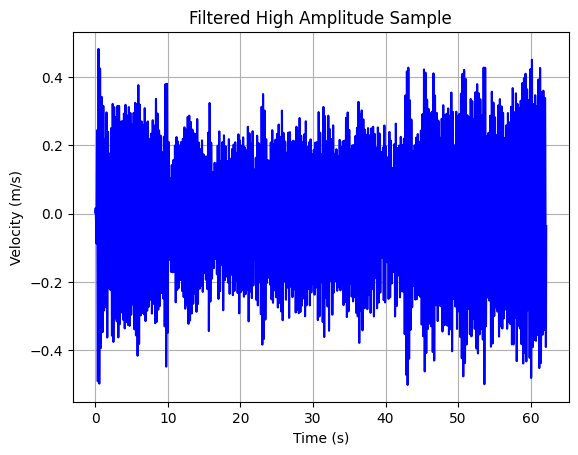

In [ ]:
# Signal filtering
filterOrder = 51
cutoffFreq = dominantFreqRange
firwinCoeff = signal.firwin(filterOrder, cutoffFreq, window ='hamming', fs = samplingRate)

# Filter the signal
firwinSignal = signal.lfilter(firwinCoeff, 1.0, velocitySignal)

# Calculate statistics over time
dataFrame = []

for index in range(0, len(firwinSignal), 1):
  dataFrame.append(statsOverTime(index, firwinSignal, numSamples = 150))

# Write data to csv
pandasDF = pd.DataFrame(dataFrame, columns = headers)
pandasDF.to_csv('/content/drive/MyDrive/VelocitySignals_High_Filtered.csv', index = False, header = headers)

# Identify the dominant Frequencies
freqWelch, dataWelch = signal.welch(firwinSignal, samplingRate, window = 'hamming', scaling = 'spectrum')

# Plot fitered signal
plt.plot(time, firwinSignal, 'b')
plt.title('Filtered High Amplitude Sample')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

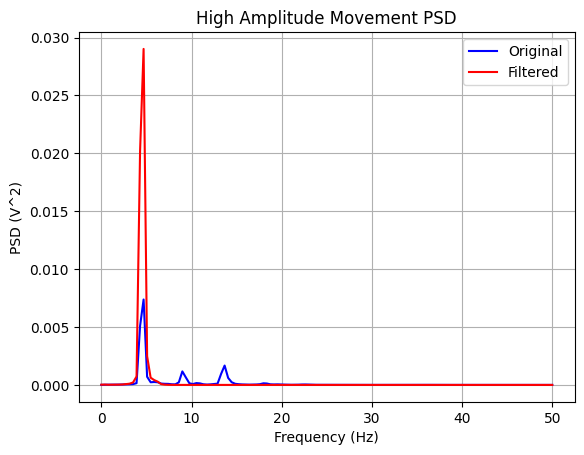

In [ ]:
# Plot Original and Filtered signal PSD
plotPSD(velocitySignal, firwinSignal, title = 'High Amplitude Movement PSD')